# PIK3CA: Effects of Mutation on MAPK1

<b> Standard imports for playing with and plotting data frames. </b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

<b> Import CPTAC data </b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and MAPK1 proteome abundance 

### Perform a t-test with mutated and non-mutated protein levels

In [4]:
protList = ['MAPK1']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

proteomics = proteomics[:100]

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

 ### We can now plot the data 

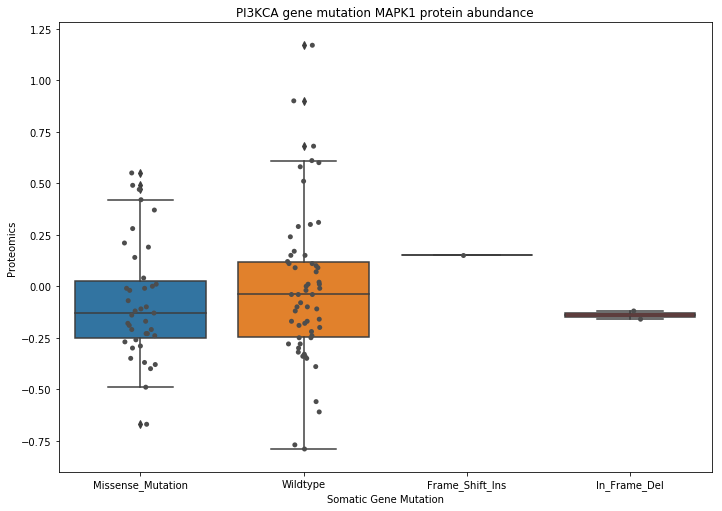

In [5]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='MAPK1', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation MAPK1 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='MAPK1',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and MAPK1 phosphoproteome abundance 

In [6]:
sites = phos.columns
p_values = []
site_names = []
protein = 'MAPK1'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            p_values.append(ttest[1])
            site_names.append(site)     
                
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

['MAPK1-T181' 'MAPK1-T185' 'MAPK1-Y187' 'MAPK14-Y182']
[0.00689798 0.00799818 0.00337724 0.00689798]
{'MAPK1-T181': 0.00689797640693264, 'MAPK1-T185': 0.007998176352313697, 'MAPK1-Y187': 0.003377236372647573, 'MAPK14-Y182': 0.00689797640693264}


In [7]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)

phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor']

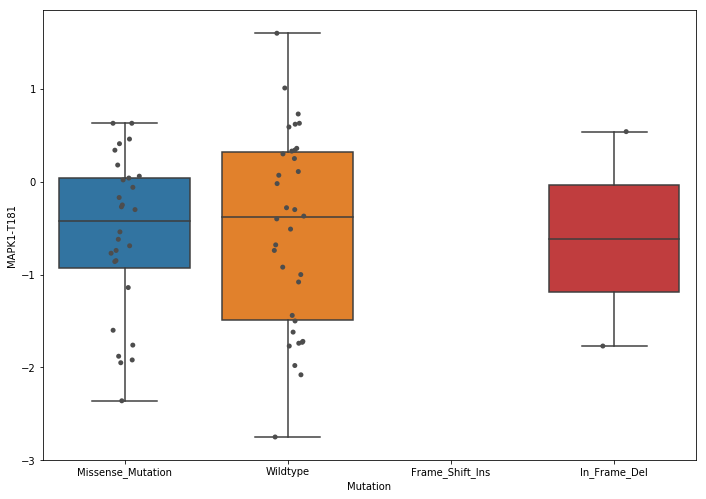

In [8]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'MAPK1-T181')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'MAPK1-T181', jitter = True, color = '.3')
plt.show()

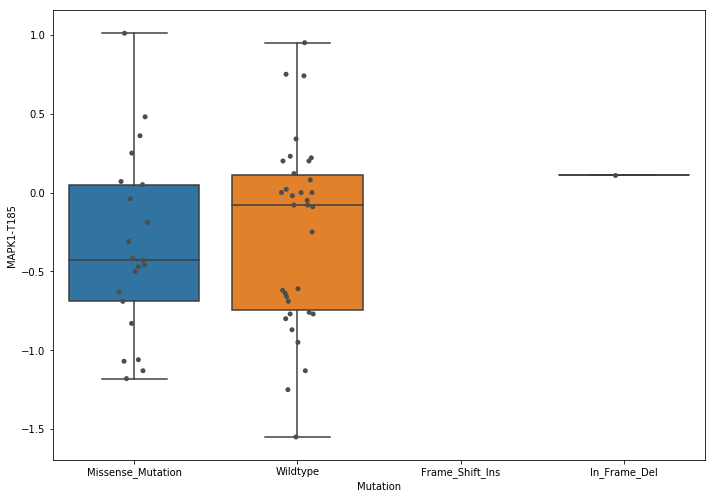

In [9]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'MAPK1-T185')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'MAPK1-T185', jitter = True, color = '.3')
plt.show()

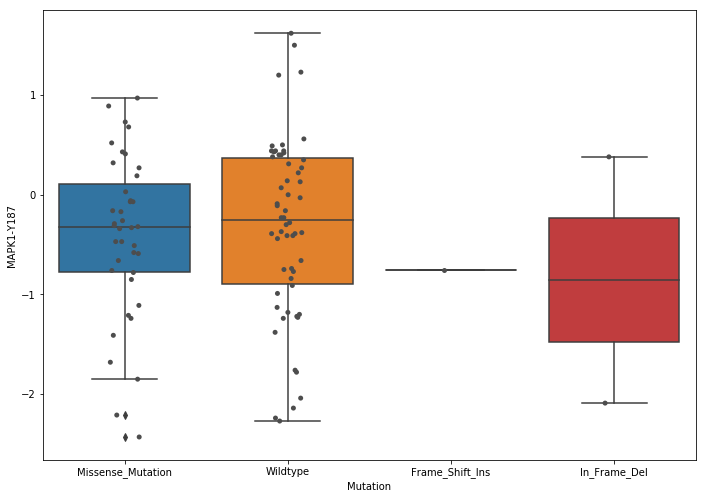

In [10]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'MAPK1-Y187')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'MAPK1-Y187', jitter = True, color = '.3')
plt.show()

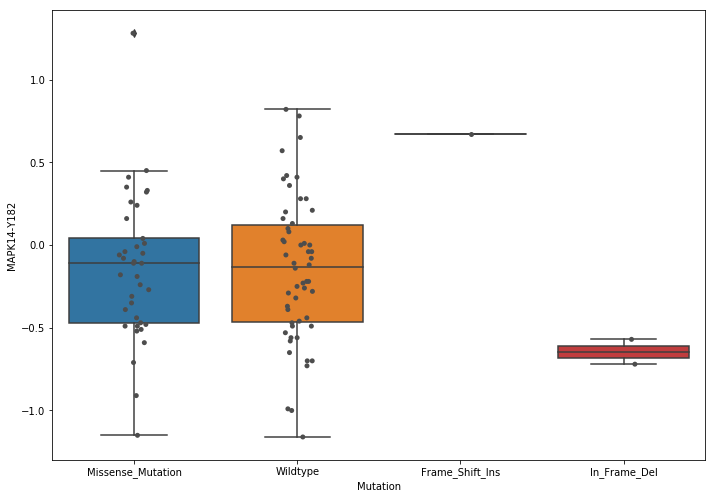

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'MAPK14-Y182')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'MAPK14-Y182', jitter = True, color = '.3')
plt.show()

## Plot all of the phosphoproteomic measurements

In [ ]:
plotdf = CPTAC.compare_mutations(proteomics, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation', gene]]
#print(plotdf)

sigResults = sigResults[:5]
print(sigResults)
for protein in sigResults:
    if(protein != 'ARID1A'):
        proteindf = CPTAC.compare_mutations(proteomics, protein, gene)[[protein]]
        print(proteindf)
        plotdf = plotdf.join(proteindf)
print(plotdf)

In [ ]:
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Mutation'
                                     }})

In [ ]:
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Protein', value_name='Signal')
#plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)
print(plotdf)

In [2]:
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Mutation": "#009933", "Control": "#008ae6"}

#print(plotdf)

#Create the plot
boxplt = sns.boxplot(x='Protein', y='Signal', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Protein', y='Signal', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Signal', fontsize='40')
boxplt.tick_params(labelsize='30')
boxplt.set_title('Proteomic Abundance of Proteins in SWI/SNF Complex ', fontsize = '45')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Mutation', 'Control'], title='ARID1A Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
#boxplt.get_legend().set_bbox_to_anchor((1, 1, 0, 0))


fig = boxplt.get_figure()
plt.show()

NameError: name 'plt' is not defined